In [224]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import random
import requests
import datetime
import os
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
"""
Complete End-to-End Time Series Analysis for Complaint Count Prediction
==========================================================================
This script performs comprehensive analysis and prediction using multiple models
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Statistical and ML libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Time series specific libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Deep learning (optional - install tensorflow if needed)
try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    KERAS_AVAILABLE = True
except:
    KERAS_AVAILABLE = False
    print("TensorFlow not available. Skipping LSTM model.")

# Prophet (optional - install prophet if needed)
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except:
    PROPHET_AVAILABLE = False
    print("Prophet not available. Skipping Prophet model.")


Prophet not available. Skipping Prophet model.


In [226]:
# Define the file paths
path1 = r'C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\twitter-complaints_per_day.csv'
path2 = r'C:\Users\LENOVO\MachineLearningProhects\TimeSeriesForecasting_End_To_End\data\twitter_x_timeseries_forcast.csv'

# Check which path exists and read CSV
if os.path.exists(path1):
    df = pd.read_csv(path1) 
elif os.path.exists(path2):
    df = pd.read_csv(path2)   
else:
    # Raise a FileNotFoundError if neither path is valid
    raise FileNotFoundError("❌ No valid data file found in either specified path.")

In [227]:
df.head()

,Unnamed: 0,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count
0,0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10.0
1,1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12.0
2,2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5.0
3,3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15.0
4,4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16.0


In [228]:
df.drop(columns='Unnamed: 0', inplace=True)

In [229]:
df

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count
0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10.0
1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12.0
2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5.0
3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15.0
4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16.0
...,...,...,...,...,...,...,...,...,...,...
1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18.0
1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18.0
1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17.0
1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37.0


In [230]:
df['time'] = pd.to_datetime(df['time'])


In [231]:
df.set_index('time', inplace=True)

In [232]:
df

,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count
time,,,,,,,,,
2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10.0
2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12.0
2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5.0
2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15.0
2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16.0
...,...,...,...,...,...,...,...,...,...
2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18.0
2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18.0
2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17.0


In [233]:
def perform_eda(df):
    """Comprehensive exploratory data analysis"""
    
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    # Basic statistics
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    # Target variable analysis
    target = 'Complaint_Count'
    print(f"\n{target} Statistics:")
    print(f"Mean: {df[target].mean():.2f}")
    print(f"Median: {df[target].median():.2f}")
    print(f"Std: {df[target].std():.2f}")
    print(f"Min: {df[target].min():.2f}")
    print(f"Max: {df[target].max():.2f}")
    
    # Correlation analysis
    print("\nCorrelation with Complaint_Count:")
    correlations = df.corr()[target].sort_values(ascending=False)
    print(correlations)
    
    # Visualizations
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    
    # Time series plot
    axes[0, 0].plot(df.index, df[target], linewidth=2)
    axes[0, 0].set_title('Complaint Count Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Complaints')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Distribution
    axes[0, 1].hist(df[target], bins=30, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Distribution of Complaints', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Complaint Count')
    axes[0, 1].set_ylabel('Frequency')
    
    # Box plot by month
    df['month'] = df.index.month
    df.boxplot(column=target, by='month', ax=axes[1, 0])
    axes[1, 0].set_title('Complaints by Month', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Complaints')
    
    # Temperature vs Complaints
    axes[1, 1].scatter(df['temp_mean_C'], df[target], alpha=0.5)
    axes[1, 1].set_title('Temperature vs Complaints', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Mean Temperature (°C)')
    axes[1, 1].set_ylabel('Complaints')
    
    # Precipitation vs Complaints
    axes[2, 0].scatter(df['precip_mm'], df[target], alpha=0.5, color='green')
    axes[2, 0].set_title('Precipitation vs Complaints', fontsize=14, fontweight='bold')
    axes[2, 0].set_xlabel('Precipitation (mm)')
    axes[2, 0].set_ylabel('Complaints')
    
    # Correlation heatmap
    corr_features = ['temp_mean_C', 'precip_mm', 'wind_speed_max_m_s', target]
    corr_matrix = df[corr_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, ax=axes[2, 1])
    axes[2, 1].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
    print("\nEDA plots saved as 'eda_analysis.png'")
    
    df.drop('month', axis=1, inplace=True)
    
    return correlations


EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
        temp_max_C   temp_min_C  temp_mean_C    precip_mm  wind_speed_max_m_s  \
count  1228.000000  1228.000000  1228.000000  1228.000000         1228.000000   
mean     32.138355    21.951140    26.588599     5.645847           12.762622   
std       4.291665     4.592986     4.141830    12.035461            4.337403   
min      21.000000     9.600000    16.600000     0.000000            5.500000   
25%      29.400000    18.500000    24.100000     0.000000            9.500000   
50%      31.350000    24.000000    26.900000     0.100000           11.800000   
75%      34.000000    25.100000    28.600000     5.725000           15.300000   
max      45.200000    32.700000    38.300000   154.800000           35.300000   

       weather_code  heavy_rain_flag  thunderstorm_flag  Complaint_Count  
count   1228.000000      1228.000000             1228.0      1228.000000  
mean      30.630293         0.014658                0.0        25.57

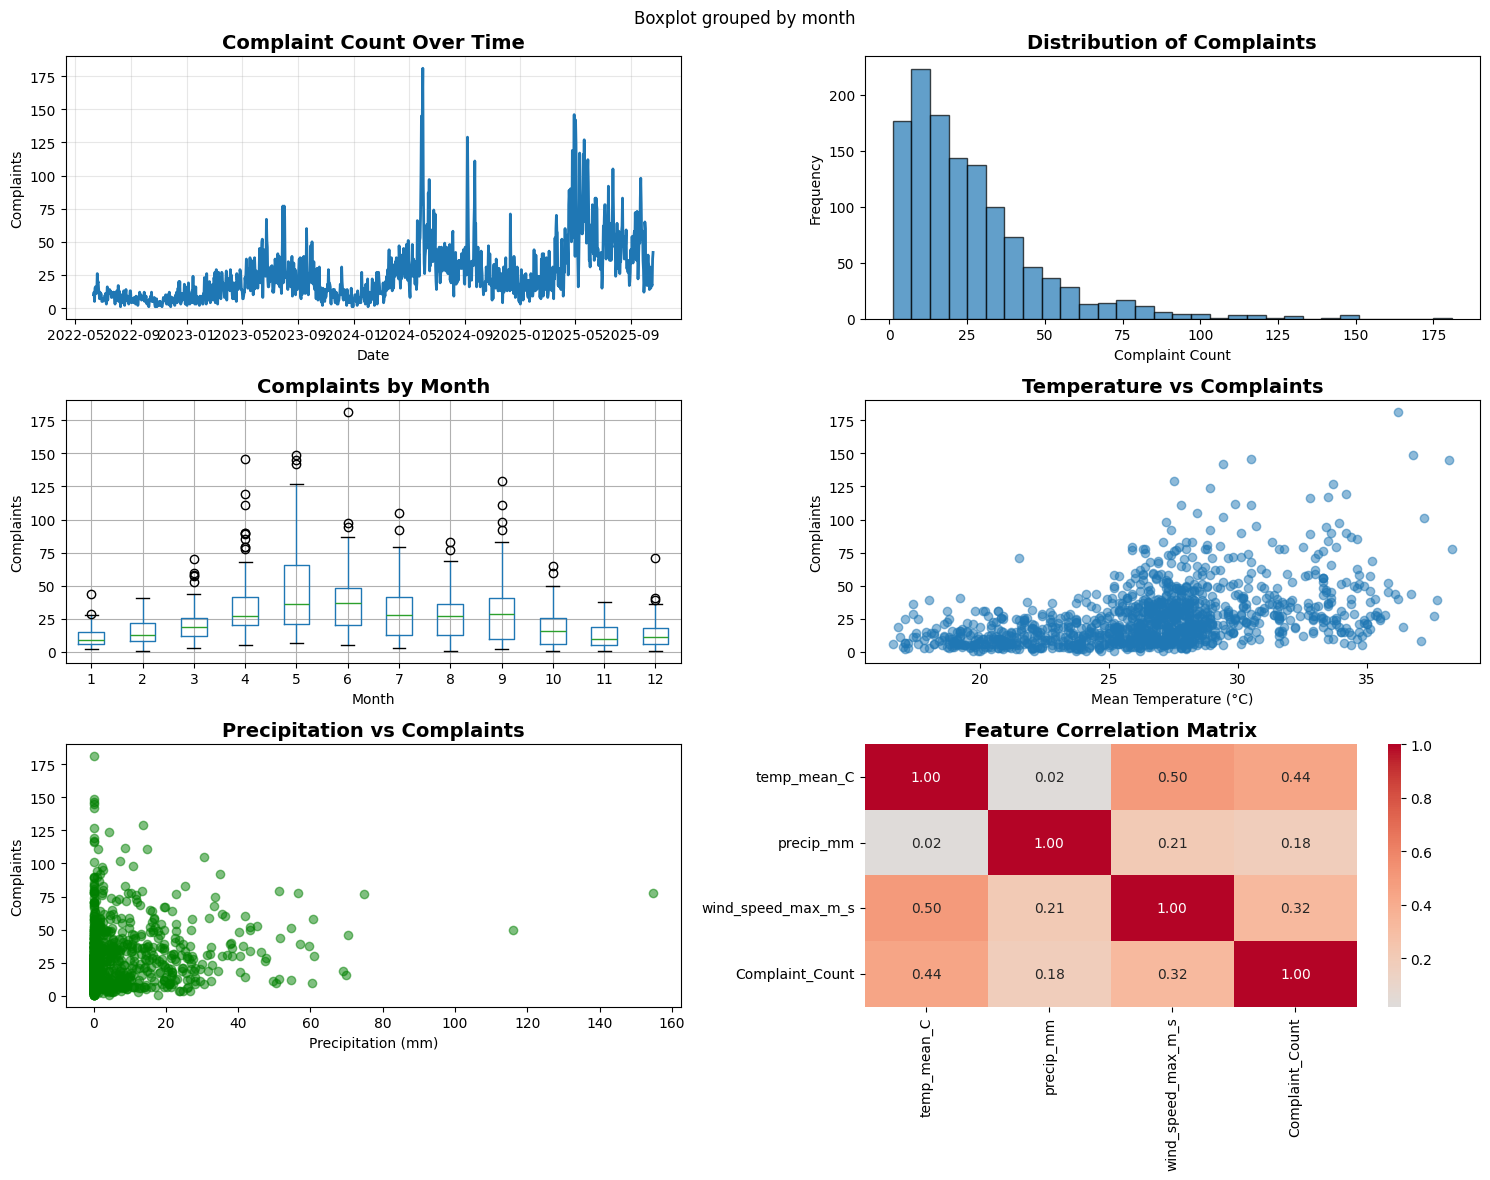

In [234]:
# Now call your function
correlations = perform_eda(df)

# If you want to see the returned correlations
print("\nTop correlated features:\n", correlations.head())